# Table of Contents
1. Import libraries
2. Import data: ords_prods_cust_merge.pkl, departments_wrangled2.csv
3. Create regional segmentations from 'state'
4. Examine spending habits between regions
5. Remove low-activity customers from the data
6. Create customer profiles. Bar chart showing customer profile distributions
7. Explore customer profile-level usage frequency and expenditure info. Create bar charts for customer profile comparisons.
8. Compare customer profiles with regions and departments
9. Compare popularity of product types via department_id -> horizontal bar chart visualization.
10. Compare customer loyalty and average order spending -> stacked bar chart visualization
11. Compare region with average order spending -> stacked bar chart visualization
12. Compare region with customer loyalty -> stacked bar chart visualization

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [4]:
# define path

path = r'/users/stephenhelvig/documents/python projects/instacart basket analysis/'

In [5]:
# import latest dataset

df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [6]:
# import departments

dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled2.csv'))

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
df.shape

(32434489, 32)

In [9]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'users_avg_product_price', 'product_price_spending_flag', 'order_total',
       'avg_spend_per_user', 'avg_order_spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'family_status', 'income'],
      dtype='object')

# Create regional segmentations from 'state'

In [10]:
# Creating a dictionary -> State : Region pairs

state_to_region = {
    # Region 1 (Northeast)
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Region 2 (Midwest)
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # Region 3 (South)
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    # Region 4 (West)
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

# Create new 'region' column
df['region'] = df['state'].map(state_to_region)

In [11]:
# checking output
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [12]:
df.shape

(32434489, 33)

# Examine spending habits between regions

In [13]:
# grouping each user with a single avg_order_spending_flag
df_user_avg_ord = df[['user_id', 'region', 'avg_order_spending_flag']].drop_duplicates()

In [14]:
total_users = df['user_id'].nunique()
print(total_users)

206209


In [15]:
# creating a crosstab between region and average order amount per user

region_avg_order_spenders = pd.crosstab(df_user_avg_ord['region'], df_user_avg_ord['avg_order_spending_flag'])

In [16]:
print(region_avg_order_spenders)

avg_order_spending_flag  Avg order spender  High order spender  \
region                                                           
Midwest                              19882                6195   
Northeast                            14999                4528   
South                                28184                8671   
West                                 21707                6565   

avg_order_spending_flag  Low order spender  
region                                      
Midwest                              22442  
Northeast                            16861  
South                                31882  
West                                 24293  


In [17]:
# checking output totals

crosstab_total = region_avg_order_spenders.values.sum()
print(crosstab_total)

206209


In [18]:
# turning the crosstab into percentages to account for user population differences between regions

region_avg_order_spenders_normalized = pd.crosstab(df_user_avg_ord['region'], df_user_avg_ord['avg_order_spending_flag'],
    normalize='index') * 100

In [19]:
print(region_avg_order_spenders_normalized)

avg_order_spending_flag  Avg order spender  High order spender  \
region                                                           
Midwest                          40.977761           12.768194   
Northeast                        41.219633           12.443663   
South                            41.002662           12.614749   
West                             41.295539           12.489299   

avg_order_spending_flag  Low order spender  
region                                      
Midwest                          46.254045  
Northeast                        46.336704  
South                            46.382589  
West                             46.215162  


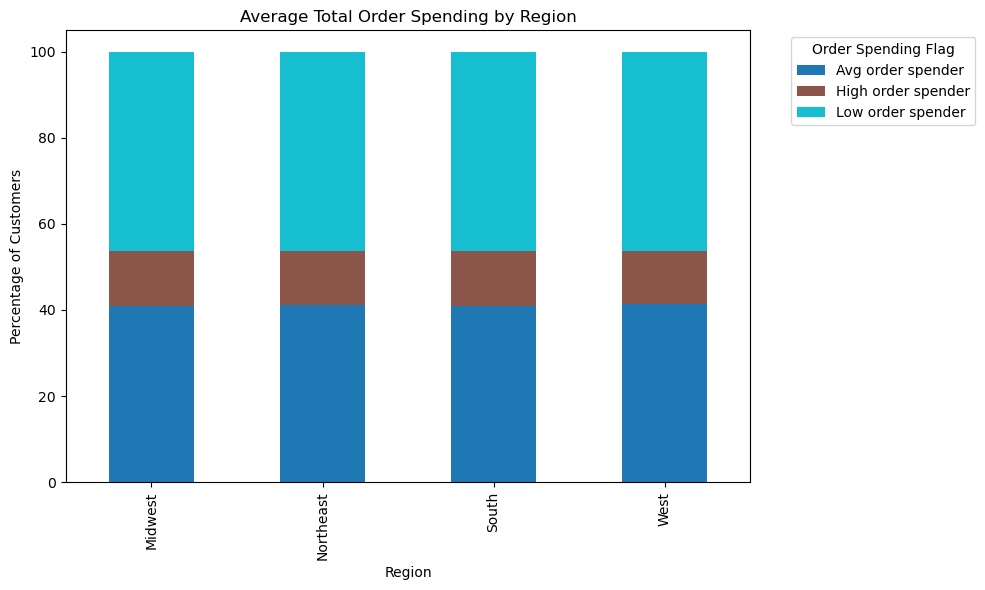

In [20]:
# Stacked bar for avg order spending

region_avg_order_spenders_normalized.plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)

plt.title("Average Total Order Spending by Region")
plt.ylabel("Percentage of Customers")
plt.xlabel("Region")
plt.legend(title="Order Spending Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# exporting visualization

stackedbar_avg_ord_region = plt.gcf()  # capture current figure
stackedbar_avg_ord_region.savefig(
    os.path.join(path, 'Analysis','Visualizations','region_avg_order_spend_stacked.png'),
    dpi=300, bbox_inches="tight"
)
plt.show()

In [21]:
# grouping each user with a single product_price_spending_flag

df_user_avg_prod = df[['user_id', 'region', 'product_price_spending_flag']].drop_duplicates()

In [22]:
# creating a crosstab between region and average product price per user

region_avg_prod_spenders = pd.crosstab(df_user_avg_prod['region'], df_user_avg_prod['product_price_spending_flag'])

In [23]:
print(region_avg_prod_spenders)

product_price_spending_flag  High spender  Low spender
region                                                
Midwest                               803        47716
Northeast                             548        35840
South                                1149        67588
West                                  907        51658


In [24]:
# turning the average crosstab into percentages to account for user population differences between regions

region_avg_prod_spenders_normalized = pd.crosstab(df_user_avg_prod['region'], df_user_avg_prod['product_price_spending_flag'],
    normalize='index') * 100

In [25]:
print(region_avg_prod_spenders_normalized)

product_price_spending_flag  High spender  Low spender
region                                                
Midwest                          1.655022    98.344978
Northeast                        1.505991    98.494009
South                            1.671589    98.328411
West                             1.725483    98.274517


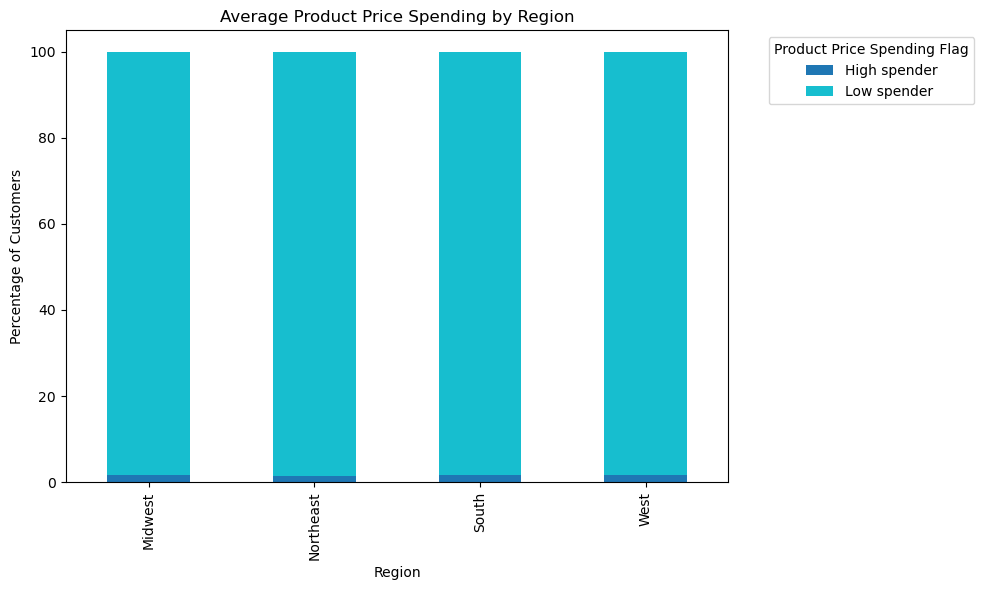

In [26]:
# Stacked bar for avg product price spending by Region

region_avg_prod_spenders_normalized.plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)

plt.title("Average Product Price Spending by Region")
plt.ylabel("Percentage of Customers")
plt.xlabel("Region")
plt.legend(title="Product Price Spending Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# exporting visualization

stackedbar_avg_prod_region = plt.gcf()  # capture current figure
stackedbar_avg_prod_region.savefig(
    os.path.join(path, 'Analysis','Visualizations','region_avg_prod_spend_stacked.png'),
    dpi=300, bbox_inches="tight"
)
plt.show()

Spending habits between regions in the US are consistent, both at the average order level and the average product price level. 

# Remove low-activity customers from the data

In [27]:
# finding max order of each user

df['max_order'] = df.groupby(['user_id'])['order_number'].transform('max')

In [28]:
# creating an activity flag

df['activity_flag'] = 'active' # default
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low_activity'

In [29]:
# dropping max_order column

df.drop(columns = ['max_order'], inplace = True)

In [30]:
# checking outputs

df['activity_flag'].value_counts(dropna = False)

activity_flag
active          30992966
low_activity     1441523
Name: count, dtype: int64

In [31]:
# split users into active and low_activity

df_active = df[df['activity_flag'] == 'active']
df_low    = df[df['activity_flag'] == 'low_activity']

In [32]:
# check output

df_active.head(100)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,West,active
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,West,active
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,West,active
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,West,active


In [33]:
df_active.shape

(30992966, 33)

In [34]:
df_low.shape

(1441523, 33)

In [35]:
# export low_activity users

df_low.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_users.pkl'))

# Create customer profiles

In [36]:
# look up department_ids for aid in customer profiling

print(dept)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [37]:
# creating a new copy of df_active

df_active = df_active.copy()

In [38]:
# Creating department sets for certain customer profiles

DEPTS_YOUNG_PARENT = {18, 16}   # babies, dairy eggs
DEPTS_ESTABLISHED  = {17, 4, 1, 10, 16, 13}    # household, produce, frozen, bulk, dairy eggs, pantry

In [39]:
# creating user-level dataframe for one customer profile per user

u = (df_active
     .groupby('user_id')
     .agg(
         age=('age', lambda s: s.mode().iloc[0]),
         income=('income', lambda s: s.mode().iloc[0]),
         dependents=('number_of_dependents', lambda s: s.mode().iloc[0]),
         p_evening=('order_hour_of_day', lambda s: (s >= 17).mean())
     )
)

In [40]:
# Profiling based on department_id for young parents and established families -> "has EVER purchased from these departments" TRUE/FALSE

has_young_parent_depts = (df_active
    .assign(in_set=df_active['department_id'].isin(DEPTS_YOUNG_PARENT))
    .groupby('user_id')['in_set'].any())

has_established_depts = (df_active
    .assign(in_set=df_active['department_id'].isin(DEPTS_ESTABLISHED))
    .groupby('user_id')['in_set'].any())

In [41]:
# merging new columns from dept profiling back onto user-level dataframe

u['has_young_parent_depts'] = has_young_parent_depts.reindex(u.index, fill_value=False)
u['has_established_depts']  = has_established_depts.reindex(u.index, fill_value=False)

In [42]:
# Creating all customer profile rules and assigning one profile per user

conds = [
    # Young Parent: 1+ dependents, age < 40, income < 120k, has relevant depts
    (u['dependents'] >= 1) & (u['age'] < 40) & (u['income'] < 120_000) & (u['has_young_parent_depts']),
    # Established Family: 1+ dependents, age 40+, income 50k+, has relevant depts
    (u['dependents'] >= 1) & (u['age'] >= 40) & (u['income'] >= 50_000) & (u['has_established_depts']),
    # Mature Affluent: no dependents, age 50+, income 80k+
    (u['dependents'] == 0) & (u['age'] >= 50) & (u['income'] >= 80_000),
    # Young Adult: no dependents, age < 40, usually shops evening (≥50% of orders at 5pm+)
    (u['dependents'] == 0) & (u['age'] < 40) & (u['p_evening'] >= 0.5),
]
choices = ['Young Parent', 'Established Family', 'Mature Affluent', 'Young Adult']

u['customer_profile'] = np.select(conds, choices, default='General Shopper')

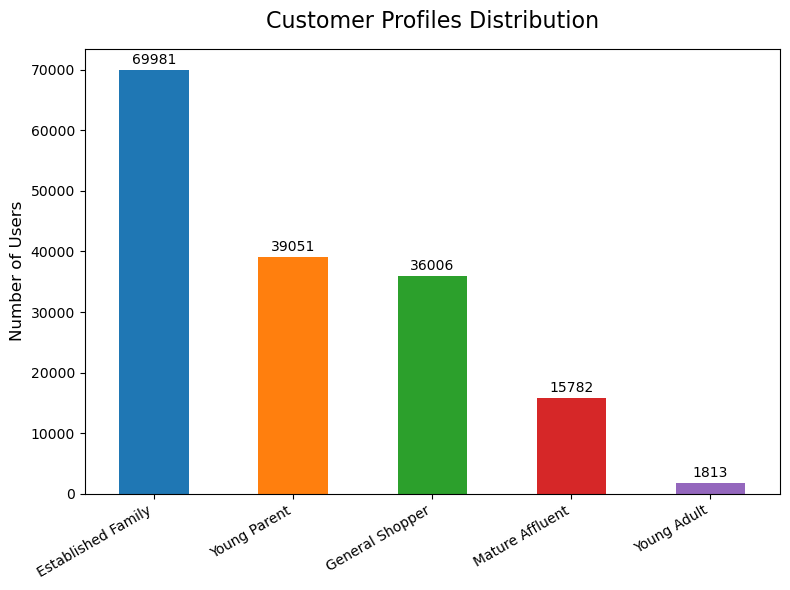

In [43]:
# Creating a bar chart for customer profile distribution

# Get counts
profile_counts = u['customer_profile'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8,6))
profile_counts.plot(kind='bar', ax=ax, color=plt.cm.tab10.colors)

# Titles and labels
ax.set_title("Customer Profiles Distribution", fontsize=16, pad=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Number of Users", fontsize=12)

# Rotate x labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Clean layout, export, display
plt.tight_layout()

bar_cust_profile = plt.gcf()  # capture current figure
bar_cust_profile.savefig(
    os.path.join(path, 'Analysis','Visualizations','customer_profile_distribution.png'),
    dpi=300, bbox_inches="tight"
)
plt.show()

In [44]:
# attach back to the row-level dataframe df_active

df_active = df_active.merge(u[['customer_profile']], left_on='user_id', right_index=True)

In [45]:
# checking output

df_active.shape

(30992966, 34)

In [46]:
# checking outputs

df_active['customer_profile'].value_counts(dropna = False)

customer_profile
Established Family    13935388
Young Parent           7822416
General Shopper        5772273
Mature Affluent        3223945
Young Adult             238944
Name: count, dtype: int64

In [47]:
df_active.sample(10, random_state=42)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,customer_profile
29614896,3408924,188082,3,1,13,30.0,False,3020,6,0,...,Male,Utah,19,1/14/2017,2,living with parents and siblings,72233,West,active,Young Parent
18672147,544136,118174,46,0,13,3.0,False,36389,7,1,...,Male,Connecticut,36,5/30/2017,2,married,67200,Northeast,active,Young Parent
30032638,1463177,190832,23,3,16,1.0,False,5818,4,1,...,Female,South Carolina,45,6/6/2017,1,married,156430,South,active,Established Family
7062354,3117946,44836,5,0,17,3.0,False,30353,7,0,...,Male,Connecticut,73,10/7/2017,0,divorced/widowed,152763,Northeast,active,Mature Affluent
30705636,1726673,195030,37,5,16,16.0,False,12788,6,1,...,Female,Colorado,49,2/14/2017,0,single,76554,West,active,General Shopper
24921144,1154786,158205,13,0,7,5.0,False,35503,5,1,...,Female,Arizona,21,1/20/2017,3,living with parents and siblings,69484,West,active,Young Parent
13044952,3321509,82543,2,2,13,6.0,False,9444,12,0,...,Male,New Jersey,24,9/25/2018,2,married,97968,Northeast,active,Young Parent
13164202,1222480,83326,82,0,17,4.0,False,11140,13,1,...,Male,Tennessee,65,4/18/2017,0,divorced/widowed,157841,South,active,Mature Affluent
27631516,2364878,175587,11,1,7,1.0,False,24841,2,1,...,Male,Utah,69,3/12/2017,1,married,126205,West,active,Established Family
6300341,1512466,40131,1,1,9,NaN,True,27662,6,0,...,Female,Utah,44,11/8/2018,3,married,96231,West,active,Established Family


# Explore customer profile-level usage frequency and expenditure info

In [48]:
# create user-level usage + expenditure info

user_usage = (df_active
    .groupby(['user_id', 'customer_profile'])
    .agg(
        # frequency: number of orders
        order_count=('order_id', 'nunique'),
        # expenditure: total and average spend
        total_spend=('order_total', 'sum'),
        avg_spend=('order_total', 'mean'),
        max_spend=('order_total', 'max'),
        min_spend=('order_total', 'min')
    )
    .reset_index()
)

In [49]:
# Aggregate at customer profile level using user level info

profile_summary = (user_usage
    .groupby('customer_profile')
    .agg(
        # usage frequency stats
        freq_max=('order_count', 'max'),
        freq_mean=('order_count', 'mean'),
        freq_min=('order_count', 'min'),

        # expenditure stats
        exp_max=('total_spend', 'max'),
        exp_mean=('total_spend', 'mean'),
        exp_min=('total_spend', 'min'),

        # average order sizes
        aov_max=('avg_spend', 'max'),
        aov_mean=('avg_spend', 'mean'),
        aov_min=('avg_spend', 'min'),
    )
    .reset_index()
)

print(profile_summary)

     customer_profile  freq_max  freq_mean  freq_min    exp_max      exp_mean  \
0  Established Family        99  19.089553         5  1469675.7  24970.798884   
1     General Shopper        99  17.990974         5  1782581.1  17742.241159   
2     Mature Affluent        99  19.264605         5   952076.2  25885.827931   
3         Young Adult        99  13.798676         5   416317.7  15215.713745   
4        Young Parent        99  19.252157         5  1100611.0  24881.395363   

   exp_min     aov_max    aov_mean   aov_min  
0     11.2  556.720799   99.603777  1.300000  
1      5.0  489.989307   76.670436  1.000000  
2     46.2  432.975855  101.154949  7.200000  
3     35.8  390.541932   90.721045  5.114286  
4     17.6  516.490133   97.498038  2.514286  


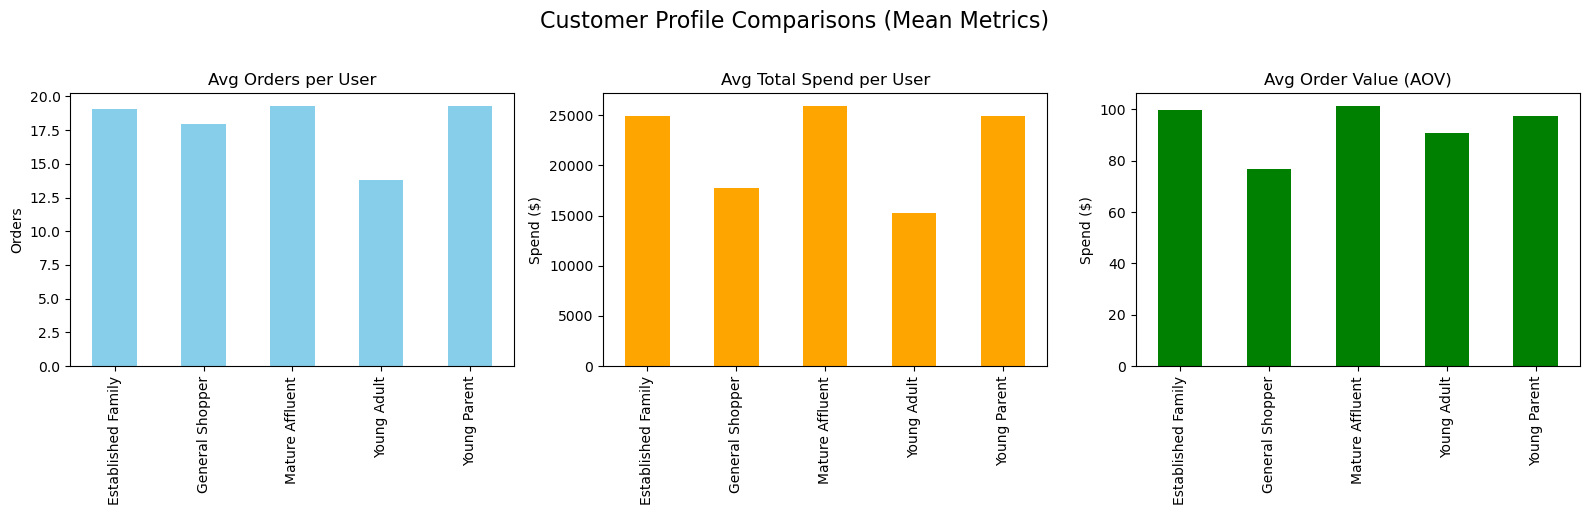

In [50]:
# create bar charts for customer profile frequencies and expenditures

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharex=True)

# Mean frequency
profile_summary.plot(kind='bar', x='customer_profile', y='freq_mean',
                     ax=axes[0], legend=False, color='skyblue')
axes[0].set_title("Avg Orders per User")
axes[0].set_ylabel("Orders")
axes[0].set_xlabel("")

# Mean total spend
profile_summary.plot(kind='bar', x='customer_profile', y='exp_mean',
                     ax=axes[1], legend=False, color='orange')
axes[1].set_title("Avg Total Spend per User")
axes[1].set_ylabel("Spend ($)")
axes[1].set_xlabel("")

# Mean AOV
profile_summary.plot(kind='bar', x='customer_profile', y='aov_mean',
                     ax=axes[2], legend=False, color='green')
axes[2].set_title("Avg Order Value (AOV)")
axes[2].set_ylabel("Spend ($)")
axes[2].set_xlabel("")

plt.suptitle("Customer Profile Comparisons (Mean Metrics)", fontsize=16, y=1.02)
plt.tight_layout()

# exporting visualization

cust_profile_comparison = plt.gcf()  # capture current figure
cust_profile_comparison.savefig(
    os.path.join(path, 'Analysis','Visualizations','customer_profile_comparisons.png'),
    dpi=300, bbox_inches="tight"
)
plt.show()

# Compare customer profiles with regions and departments

In [51]:
# creating a dataframe that includes region at the user-level

user = df_active[['user_id', 'region']].drop_duplicates('user_id')

# updating u dataframe with region merge

u = u.merge(user[['user_id', 'region']], left_index=True, right_on='user_id')

In [52]:
# creating a crosstab between customer profiles and regions

customer_profile_regions = pd.crosstab(u['customer_profile'], u['region'])

print(customer_profile_regions)

region              Midwest  Northeast  South   West
customer_profile                                    
Established Family    16642      12268  23248  17823
General Shopper        8518       6394  11975   9119
Mature Affluent        3678       2831   5217   4056
Young Adult             399        316    656    442
Young Parent           9140       6772  13098  10041


In [53]:
# normalizing for proportions

cust_prof_reg_normalized = pd.crosstab(u['customer_profile'], u['region'], normalize='index')*100

print(cust_prof_reg_normalized)

region                Midwest  Northeast      South       West
customer_profile                                              
Established Family  23.780740  17.530473  33.220446  25.468341
General Shopper     23.657168  17.758151  33.258346  25.326334
Mature Affluent     23.305031  17.938157  33.056647  25.700165
Young Adult         22.007722  17.429675  36.183122  24.379482
Young Parent        23.405291  17.341425  33.540754  25.712530


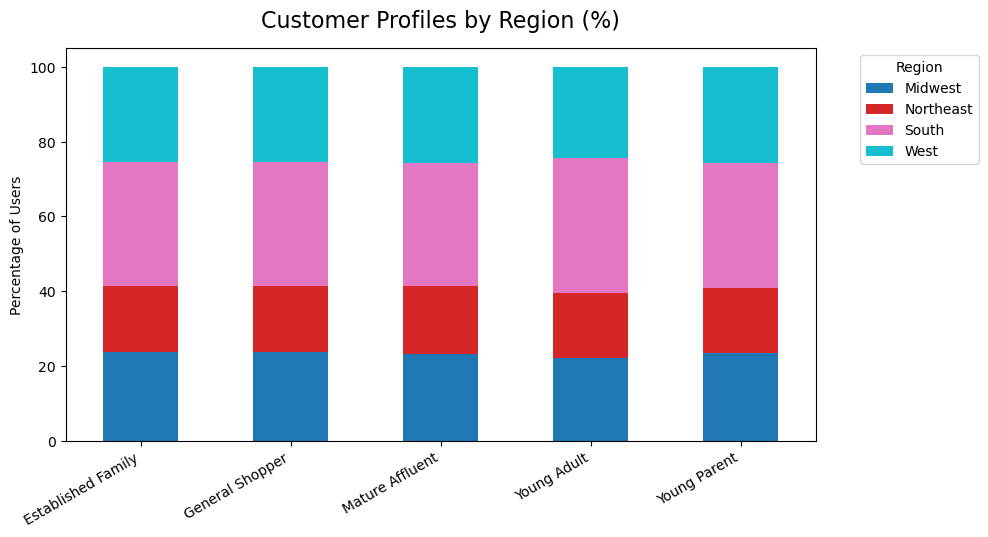

In [54]:
# creating stacked bar chart for customer profiles by region

cust_prof_reg_normalized.plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)

import matplotlib.pyplot as plt
plt.title("Customer Profiles by Region (%)", fontsize=16, pad=15)
plt.ylabel("Percentage of Users")
plt.xlabel("")

# Legend outside for readability
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Rotate x labels for readability
plt.xticks(rotation=30, ha='right')

# exporting visualization

cust_profiles_region = plt.gcf()  # capture current figure
cust_profiles_region.savefig(
    os.path.join(path, 'Analysis','Visualizations','customer_profiles_by_region.png'),
    dpi=300, bbox_inches="tight"
)

plt.show()

In [55]:
# creating a crosstab between customer profiles and departments

cust_prof_dept = pd.crosstab(df_active['customer_profile'], df_active['department_id'])

print(cust_prof_dept)

department_id           1      2       3        4      5       6        7   \
customer_profile                                                             
Established Family  963628  15217  511596  4143801  61136  117740  1115514   
General Shopper     380681   6847  202700  1602702  33118   43434   554908   
Mature Affluent     224626   3589  119158   969323  15152   27495   254179   
Young Adult          19452    236    8466    68105   1365    2230    19445   
Young Parent        534955   8522  283106  2295345  33856   65092   627888   

department_id          8       9      10  ...      12      13      14      15  \
customer_profile                          ...                                   
Established Family  42495  381507  14560  ...  323963  816729  295494  470442   
General Shopper     16638  136192   6838  ...  100030  313073  136577  168812   
Mature Affluent      9940   88170   3149  ...   74634  189457   67540  108123   
Young Adult           891    6977    239  ...   

In [56]:
# normalize for proportions

cust_prof_dept_normalized = pd.crosstab(df_active['customer_profile'], df_active['department_id'], normalize='index')*100

print(cust_prof_dept_normalized)

department_id             1         2         3          4         5   \
customer_profile                                                        
Established Family  6.914971  0.109197  3.671200  29.735814  0.438710   
General Shopper     6.594993  0.118619  3.511615  27.765527  0.573743   
Mature Affluent     6.967427  0.111323  3.696031  30.066363  0.469983   
Young Adult         8.140820  0.098768  3.543090  28.502494  0.571264   
Young Parent        6.838744  0.108943  3.619163  29.343172  0.432807   

department_id             6         7         8         9         10  ...  \
customer_profile                                                      ...   
Established Family  0.844899  8.004901  0.304943  2.737685  0.104482  ...   
General Shopper     0.752459  9.613336  0.288240  2.359417  0.118463  ...   
Mature Affluent     0.852837  7.884099  0.308318  2.734848  0.097675  ...   
Young Adult         0.933273  8.137890  0.372891  2.919931  0.100023  ...   
Young Parent        0.8321

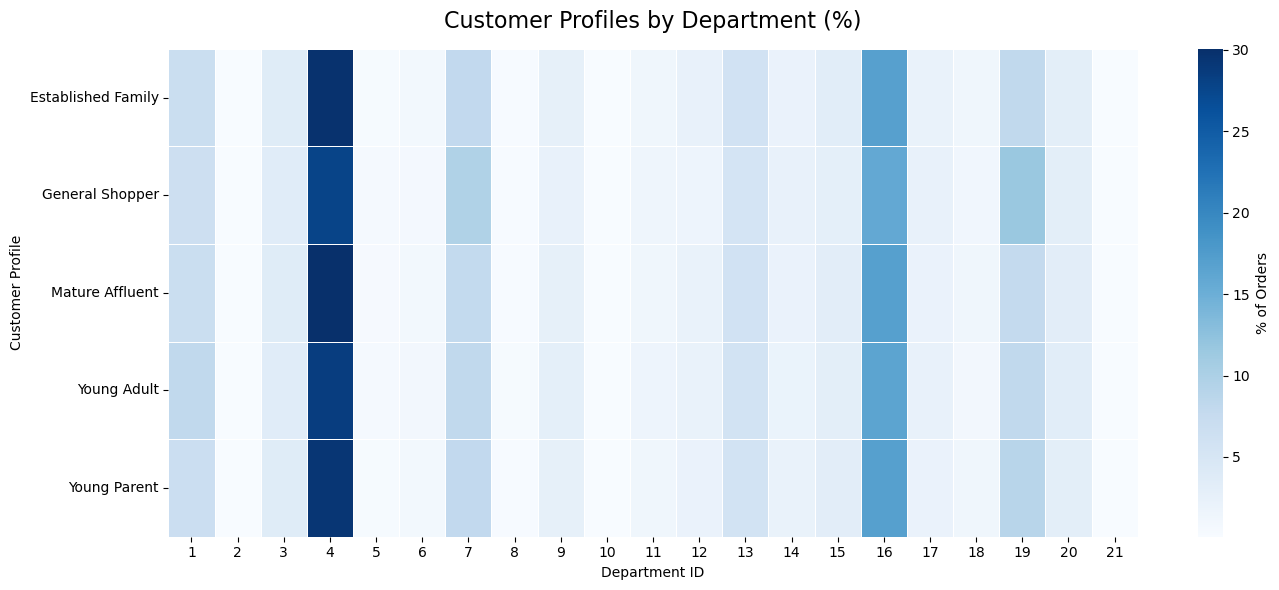

In [57]:
# creating a heatmap for frequency of department orders across customer profiles

plt.figure(figsize=(14,6))
sns.heatmap(
    cust_prof_dept_normalized,
    cmap="Blues",
    annot=False,
    cbar_kws={'label': '% of Orders'},
    linewidths=0.5,        # thickness of grid lines
    linecolor="white"      # color of grid lines
)
plt.title("Customer Profiles by Department (%)", fontsize=16, pad=15)
plt.ylabel("Customer Profile")
plt.xlabel("Department ID")
plt.tight_layout()

# exporting visualization

cust_profiles_dept = plt.gcf()  # capture current figure
cust_profiles_dept.savefig(
    os.path.join(path, 'Analysis','Visualizations','customer_profiles_by_department.png'),
    dpi=300, bbox_inches="tight"
)
plt.show()

# Compare popularity of product types via department_id

In [68]:
# look at popularity of products ordered by department_id

dept_unique_orders = df_active.groupby('department_id')['order_id'].nunique()

print(dept_unique_orders)

department_id
1     1124309
2       33246
3      841995
4     2303685
5       79655
6      210988
7     1391506
8       56368
9      568596
10      32698
11     303095
12     547291
13    1064799
14     500965
15     647047
16    2082518
17     447119
18     173885
19    1330617
20     735224
21      55779
Name: order_id, dtype: int64


In [69]:
# Count unique orders per department
dept_unique_orders = (
    df_active.groupby('department_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'unique_orders'})
)

# Merge with department names
dept_unique_orders = dept_unique_orders.merge(dept, on='department_id', how='left')

# Sort descending by unique orders
dept_unique_orders = dept_unique_orders.sort_values('unique_orders', ascending=False)

In [70]:
print(dept_unique_orders.head(10))  # top 10 departments

    department_id  unique_orders       department
3               4        2303685          produce
15             16        2082518       dairy eggs
6               7        1391506        beverages
18             19        1330617           snacks
0               1        1124309           frozen
12             13        1064799           pantry
2               3         841995           bakery
19             20         735224             deli
14             15         647047     canned goods
8               9         568596  dry goods pasta


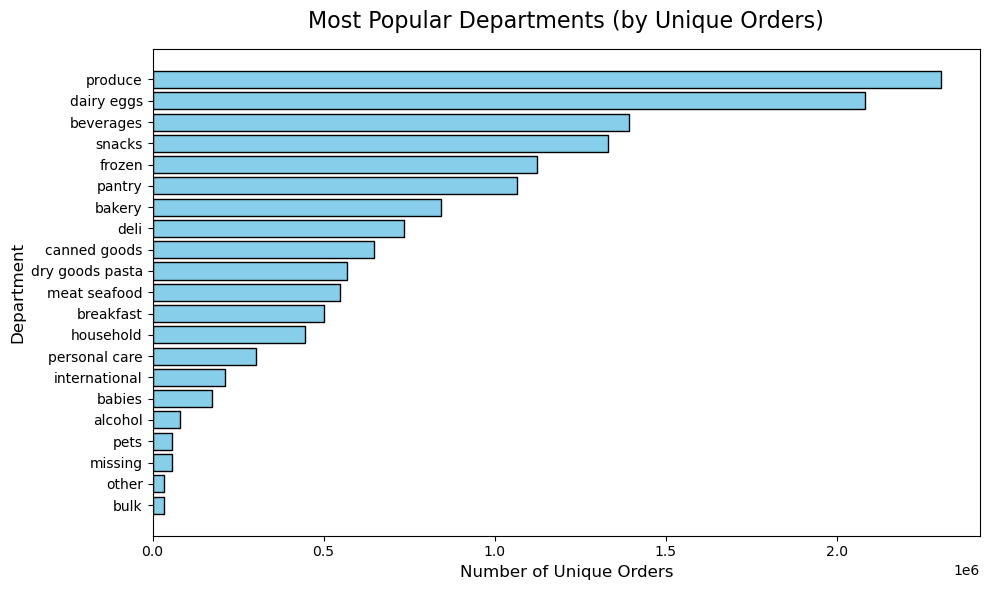

In [72]:
# visualization 

plt.figure(figsize=(10,6))
ax = plt.barh(
    dept_unique_orders['department'],
    dept_unique_orders['unique_orders'],
    color='skyblue',
    edgecolor='black'
)

plt.title("Most Popular Departments (by Unique Orders)", fontsize=16, pad=15)
plt.xlabel("Number of Unique Orders", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.gca().invert_yaxis()  # Largest at top

plt.tight_layout()

# export
out_path = os.path.join(path, "Analysis", "Visualizations", "unique_orders_by_department.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

# Compare customer loyalty and average order spending

avg_order_spending_flag  Avg order spender  High order spender  \
loyalty_flag                                                     
Loyal customer                   53.441596           21.045722   
New customer                     47.636348           27.241055   
Regular customer                 50.096915           26.272820   

avg_order_spending_flag  Low order spender  
loyalty_flag                                
Loyal customer                   25.512682  
New customer                     25.122597  
Regular customer                 23.630265  
product_price_spending_flag  High spender  Low spender
loyalty_flag                                          
Loyal customer                   0.138955    99.861045
New customer                     0.762901    99.237099
Regular customer                 0.298707    99.701293


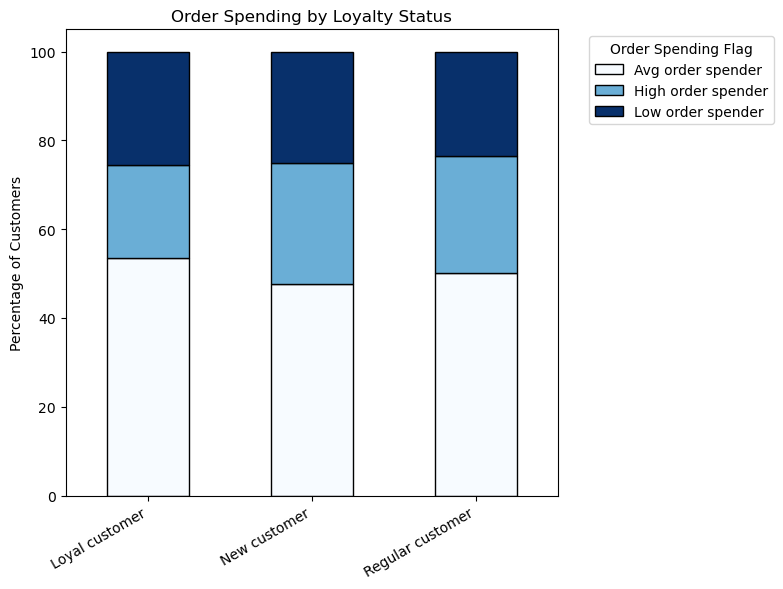

In [78]:
# Loyalty vs. Avg Order Spending
loyalty_order_spend = pd.crosstab(df_active['loyalty_flag'], df_active['avg_order_spending_flag'], normalize='index') * 100
print(loyalty_order_spend)

# Loyalty vs. Product Price Spending
loyalty_product_spend = pd.crosstab(df_active['loyalty_flag'], df_active['product_price_spending_flag'], normalize='index') * 100
print(loyalty_product_spend)

# Visualization
loyalty_order_spend.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Blues', edgecolor='black')
plt.title("Order Spending by Loyalty Status")
plt.ylabel("Percentage of Customers")
plt.xlabel("")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Order Spending Flag", bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# export
out_path = os.path.join(path, "Analysis", "Visualizations", "order_spending_by_loyalty_status.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

# Compare region with avg order spending

avg_order_spending_flag  Avg order spender  High order spender  \
region                                                           
Midwest                          50.236531           24.956056   
Northeast                        50.997883           24.564888   
South                            50.652802           24.741661   
West                             51.473167           24.453240   

avg_order_spending_flag  Low order spender  
region                                      
Midwest                          24.807413  
Northeast                        24.437229  
South                            24.605536  
West                             24.073593  


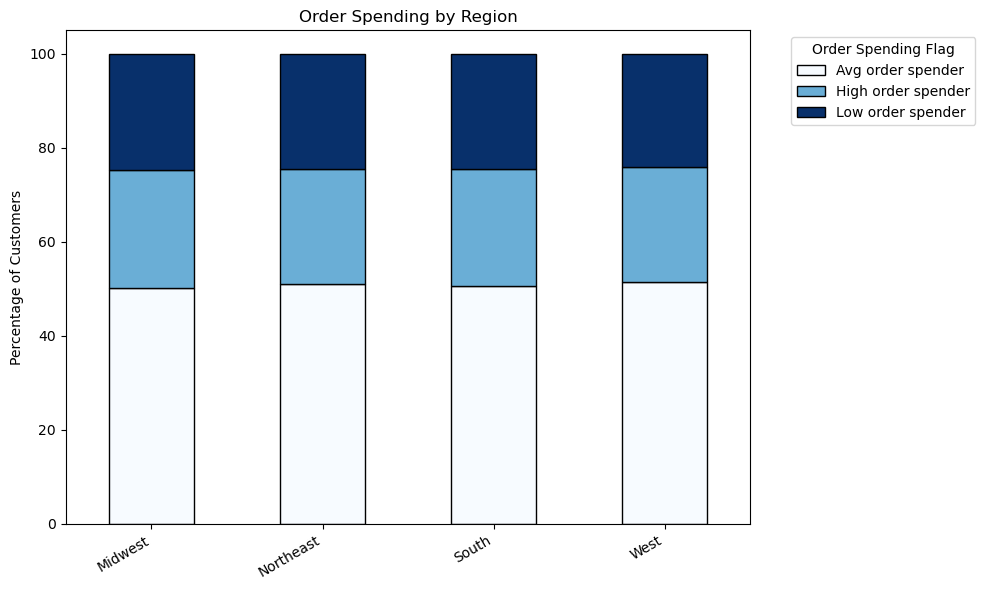

In [80]:
# Region vs. Avg Order Spending
region_order_spend = pd.crosstab(df_active['region'], df_active['avg_order_spending_flag'], normalize='index') * 100
print(region_order_spend)

# Visualization
region_order_spend.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Blues', edgecolor='black')
plt.title("Order Spending by Region")
plt.ylabel("Percentage of Customers")
plt.xlabel("")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Order Spending Flag", bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# export
out_path = os.path.join(path, "Analysis", "Visualizations", "order_spending_by_region.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

# Compare region with customer loyalty

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
Midwest            32.692104     15.654366         51.653530
Northeast          33.705997     15.410140         50.883863
South              33.030549     15.454940         51.514511
West               33.590914     15.528636         50.880449


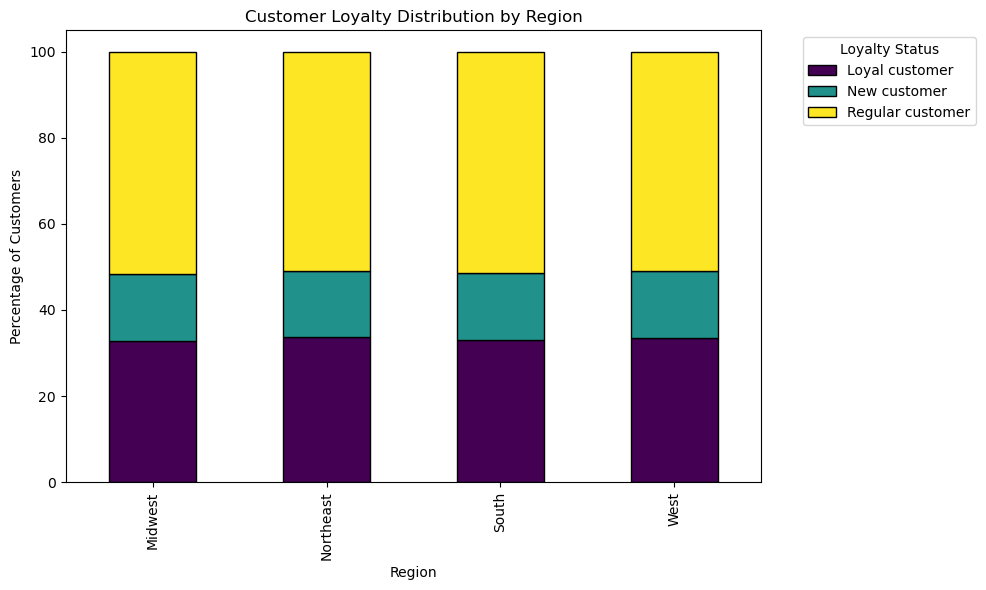

In [75]:
loyalty_region = pd.crosstab(df_active['region'], df_active['loyalty_flag'], normalize='index') * 100
print(loyalty_region)

loyalty_region.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis', edgecolor='black')
plt.title("Customer Loyalty Distribution by Region")
plt.ylabel("Percentage of Customers")
plt.xlabel("Region")
plt.legend(title="Loyalty Status", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
